# LSFB CONT Dataset

### Load the dataset

This example loads all the landmarks into the RAM. You can then fetch any instance at any instant.

In [1]:
from lsfb_dataset.datasets.lsfb_cont import LSFBContConfig, LSFBContLandmarks

# Where you downloaded the dataset
lsfb_cont_root = 'E:/LSFB/LSFB_CONT'

# Simple configuration that load all the landmarks (pose, hands)  with a simple binary segmentation as a target
simple_config = LSFBContConfig(
    root=lsfb_cont_root,
)

# More complex configuration that uses more options
complete_config = LSFBContConfig(
    root=lsfb_cont_root,
    landmarks=[             # Load these landmarks in this order (130 features)
        'hand_right',       # -- 21 landmarks (42 features)
        'hand_left',        # -- 21 landmarks (42 features)
        'pose',             # -- 23 landmarks (46 features)
    ],
    split='mini_sample',    # Only load a tiny subset of the dataset
    target='signs',         # Use binary segmentation as a target
    window=(1500, 1200),    # Use windows (size, stride) instead of the full sequences
    show_progress=True,     # Display the progress bar
)

# Dataset that loads all the landmarks in the RAM
dataset = LSFBContLandmarks(config=complete_config)

print(len(dataset))

# Fetch an instance
features, target = dataset[80]
features.shape, target.shape

---------- LSFB CONT DATASET
Target vectors loaded.
Loading landmarks hand_right, hand_left, pose for 10 videos...


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

Landmarks loaded.
Windows successfully created.
124


((1500, 130), (1500,))

### Lazy load the landmarks with a generator

Having all the landmarks in the RAM enables us to fetch them instantaneously without any major bottleneck.
It is useful in Deep Learning where the landmarks loading could slow down the training algorithm.
However, in some cases, you don't want to preload all the landmarks into the RAM.
Indeed, it takes a lot of RAM (around 5-6GB) and it's a heavy operation.
You can then use a generator that load landmarks on the fly.

In [2]:
from lsfb_dataset.datasets.lsfb_cont import LSFBContLandmarksGenerator

# Dataset that doesn't preload the landmarks
dataset = LSFBContLandmarksGenerator(config=complete_config)
print(len(dataset))

# Load an instance
features, target = dataset[80]
features.shape, target.shape

---------- LSFB CONT DATASET
Target vectors loaded.
Windows successfully created.
124


((1500, 130), (1500,))

### You can visualize your features and targets

The library provides plotting functions for the datasets

(<Figure size 2160x288 with 1 Axes>, <AxesSubplot:>)

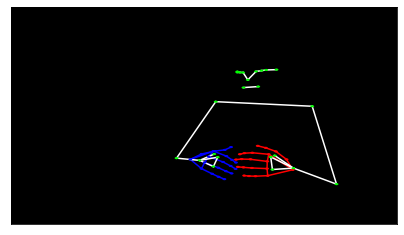

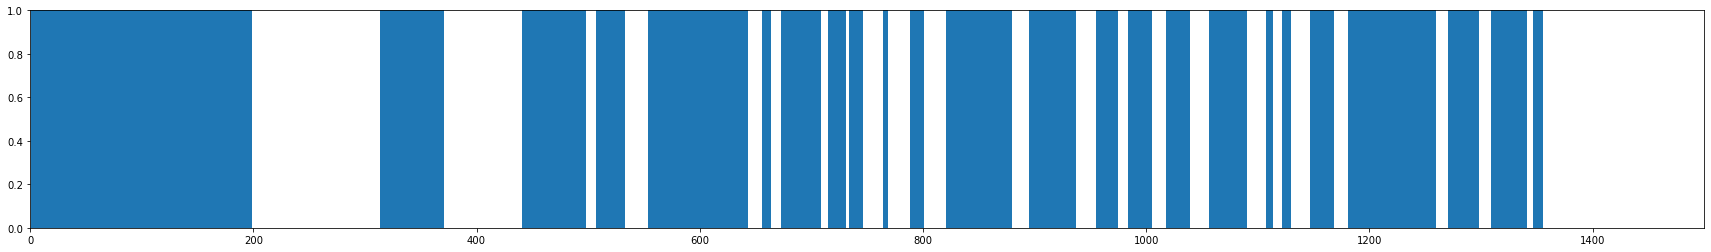

In [3]:
from lsfb_dataset.visualisation.landmarks import plot_landmarks
from lsfb_dataset.visualisation.target import plot_binary_segmentation

# Display the landmarks of the 400th frame of the instance
plot_landmarks(
    landmarks=features[400],
    landmark_types=complete_config.landmarks,
)

# Display the target segmentation of the instance
plot_binary_segmentation(target)